# Newton-Raphson Iterator
## Andrew Lincowski & Spencer Wallace
## For integration of Kepler's Equation

In [136]:
# Kepler's equation
# ecc = eccentricity
# E = eccentric anomaly
# M = mean motion
function g(ecc,E,M)
    retval = E-ecc*sin(E) - M
    retval
end

# Derivative of Kepler's equation
function dg_dE(ecc,E)
    retval = 1-ecc*cos(E)
    retval
end

# Newton-raphson function
function newt_kepler(ecc,E,M,eps)
    h = -g(ecc,E,M)/dg_dE(ecc,E)
    E += h
    if(abs(h) > eps)
        newt_kepler(ecc,E,M,eps)
    else
        E
    end
end

newt_kepler (generic function with 1 method)

In [137]:
#Test interator
M = pi/2.
ecc = 0.15
E = M + 0.85*ecc*sign(sin(M))
eps = 0.001
newt_kepler(ecc,E,M,eps)

1.7191487195364321

In [138]:
eps = 1e-14
newt_kepler(ecc,E,M,eps)

1.719148719463455

In [139]:
#Construct parameters
ecc = linspace(0,1,100)
M = linspace(0,2*pi,100)
keplerdata = Array(Real,100,100)
keplererr = Array(Real,100,100)
test1 = Array(Real,100,100)

#Calculate eccentric anomaly E
for (i,valecc) in enumerate(ecc)
    for (j,valM) in enumerate(M)
        keplerdata[i,j] = newt_kepler(valecc,E,valM,eps)
        keplererr[i,j] = keplerdata[i,j]-valecc*sin(keplerdata[i,j])-valM
        test1[i,j] = keplerdata[i,j] - valM
    end
end

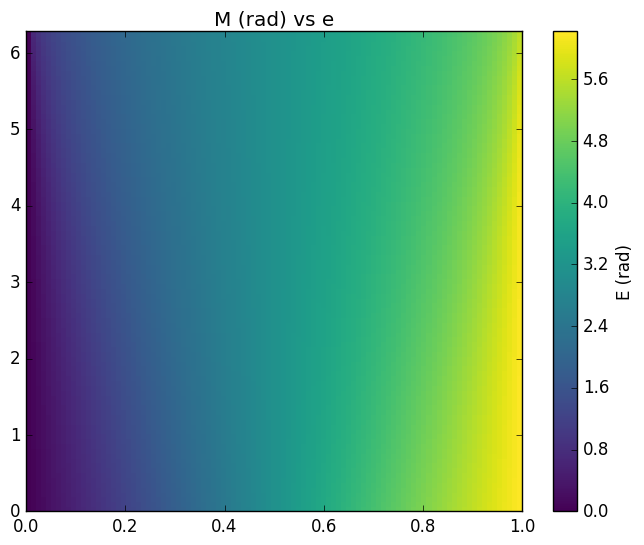

(0.0,6.283185307179586)

In [146]:
using PyPlot

plot1 = pcolor(ecc,M,keplerdata, cmap=ColorMap("viridis"))
ax = gca()
title("M (rad) vs e")
colorbar(label="E (rad)")
ylim([0,2*pi])

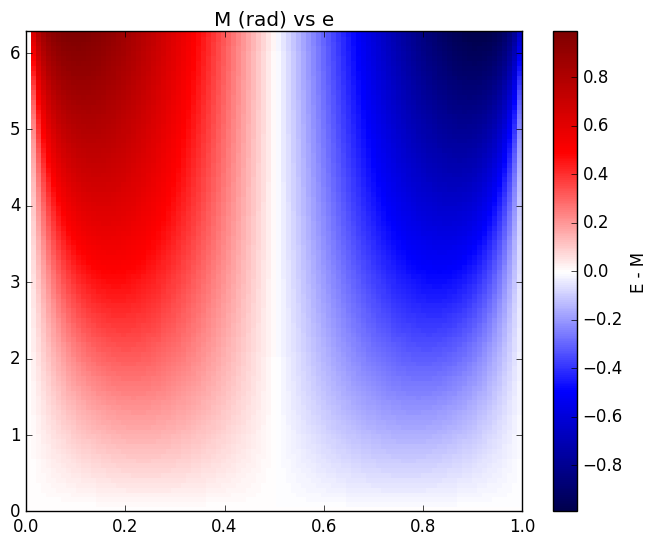

(0.0,6.283185307179586)

In [147]:
#A different way to plot this...
using PyPlot
plot1 = pcolor(ecc,M,test1,cmap=ColorMap("seismic"))
ax = gca()
title("M (rad) vs e")
colorbar(label="E - M")
ylim([0,2*pi])

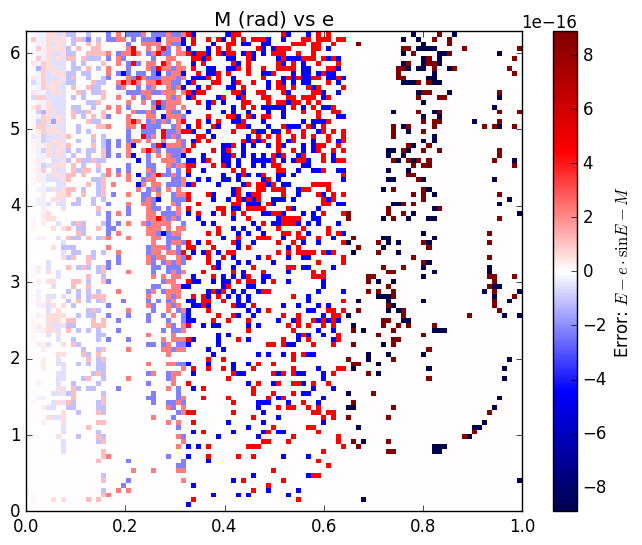

(0.0,6.283185307179586)

In [142]:
plot1 = pcolor(ecc,M,keplererr,cmap=ColorMap("seismic"))
ax = gca()
title("M (rad) vs e")
colorbar(label=L"Error: $E - e \cdot \sin E - M$")
ylim([0,2*pi])